# Algoritmo de Grover

In [11]:
!pip install qiskit[visualization]

In [12]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

In [13]:
qc = QuantumCircuit(6, 6)
qc.h(range(6))
num_iter = int(np.floor(np.pi/4*np.sqrt(2**6)))

In [14]:
num_iter

6

In [15]:
for _ in range(num_iter):
    oracle_matrix = np.identity(2**6)
    oracle_matrix[2, 2] = -1
    qc.unitary(Operator(oracle_matrix), range(6), label='Oraculo')
    qc.h(range(6))
    reflexion_matrix = np.identity(2**6)
    reflexion_matrix[0, 0] = -1
    qc.unitary(Operator(reflexion_matrix), range(6), label='Reflexion')
    qc.h(range(6))
qc.measure(range(6), range(6))
qc.draw()

┌───┐┌──────────┐┌───┐┌────────────┐┌───┐┌──────────┐┌───┐┌────────────┐»
q_0: ┤ H ├┤0         ├┤ H ├┤0           ├┤ H ├┤0         ├┤ H ├┤0           ├»
     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
q_1: ┤ H ├┤1         ├┤ H ├┤1           ├┤ H ├┤1         ├┤ H ├┤1           ├»
     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
q_2: ┤ H ├┤2         ├┤ H ├┤2           ├┤ H ├┤2         ├┤ H ├┤2           ├»
     ├───┤│  Oraculo │├───┤│  Reflexion │├───┤│  Oraculo │├───┤│  Reflexion │»
q_3: ┤ H ├┤3         ├┤ H ├┤3           ├┤ H ├┤3         ├┤ H ├┤3           ├»
     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
q_4: ┤ H ├┤4         ├┤ H ├┤4           ├┤ H ├┤4         ├┤ H ├┤4           ├»
     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
q_5: ┤ H ├┤5         ├┤ H ├┤5           ├┤ H ├┤5         ├┤ H ├┤5           ├»
     └───┘└──────────┘└───┘└────────────┘└───┘└──────────┘└───┘└────────────┘»
c: 6/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌───┐┌──────────┐┌───┐┌────────────┐┌───┐┌──────────┐┌───┐┌────────────┐»
«q_0: ┤ H ├┤0         ├┤ H ├┤0           ├┤ H ├┤0         ├┤ H ├┤0           ├»
«     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
«q_1: ┤ H ├┤1         ├┤ H ├┤1           ├┤ H ├┤1         ├┤ H ├┤1           ├»
«     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
«q_2: ┤ H ├┤2         ├┤ H ├┤2           ├┤ H ├┤2         ├┤ H ├┤2           ├»
«     ├───┤│  Oraculo │├───┤│  Reflexion │├───┤│  Oraculo │├───┤│  Reflexion │»
«q_3: ┤ H ├┤3         ├┤ H ├┤3           ├┤ H ├┤3         ├┤ H ├┤3           ├»
«     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
«q_4: ┤ H ├┤4         ├┤ H ├┤4           ├┤ H ├┤4         ├┤ H ├┤4           ├»
«     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
«q_5: ┤ H ├┤5         ├┤ H ├┤5           ├┤ H ├┤5         ├┤ H ├┤5           ├»
«     └───┘└──────────┘└───┘└────────────┘└───┘└──────────┘└───┘└────────────┘»
«c: 6/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌───┐┌──────────┐┌───┐┌────────────┐┌───┐┌──────────┐┌───┐┌────────────┐»
«q_0: ┤ H ├┤0         ├┤ H ├┤0           ├┤ H ├┤0         ├┤ H ├┤0           ├»
«     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
«q_1: ┤ H ├┤1         ├┤ H ├┤1           ├┤ H ├┤1         ├┤ H ├┤1           ├»
«     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
«q_2: ┤ H ├┤2         ├┤ H ├┤2           ├┤ H ├┤2         ├┤ H ├┤2           ├»
«     ├───┤│  Oraculo │├───┤│  Reflexion │├───┤│  Oraculo │├───┤│  Reflexion │»
«q_3: ┤ H ├┤3         ├┤ H ├┤3           ├┤ H ├┤3         ├┤ H ├┤3           ├»
«     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
«q_4: ┤ H ├┤4         ├┤ H ├┤4           ├┤ H ├┤4         ├┤ H ├┤4           ├»
«     ├───┤│          │├───┤│            │├───┤│          │├───┤│            │»
«q_5: ┤ H ├┤5         ├┤ H ├┤5           ├┤ H ├┤5         ├┤ H ├┤5           ├»
«     └───┘└──────────┘└───┘└────────────┘└───┘└──────────┘└───┘└────────────┘»
«c: 6/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌───┐┌─┐               
«q_0: ┤ H ├┤M├───────────────
«     ├───┤└╥┘┌─┐            
«q_1: ┤ H ├─╫─┤M├────────────
«     ├───┤ ║ └╥┘┌─┐         
«q_2: ┤ H ├─╫──╫─┤M├─────────
«     ├───┤ ║  ║ └╥┘┌─┐      
«q_3: ┤ H ├─╫──╫──╫─┤M├──────
«     ├───┤ ║  ║  ║ └╥┘┌─┐   
«q_4: ┤ H ├─╫──╫──╫──╫─┤M├───
«     ├───┤ ║  ║  ║  ║ └╥┘┌─┐
«q_5: ┤ H ├─╫──╫──╫──╫──╫─┤M├
«     └───┘ ║  ║  ║  ║  ║ └╥┘
«c: 6/══════╩══╩══╩══╩══╩══╩═


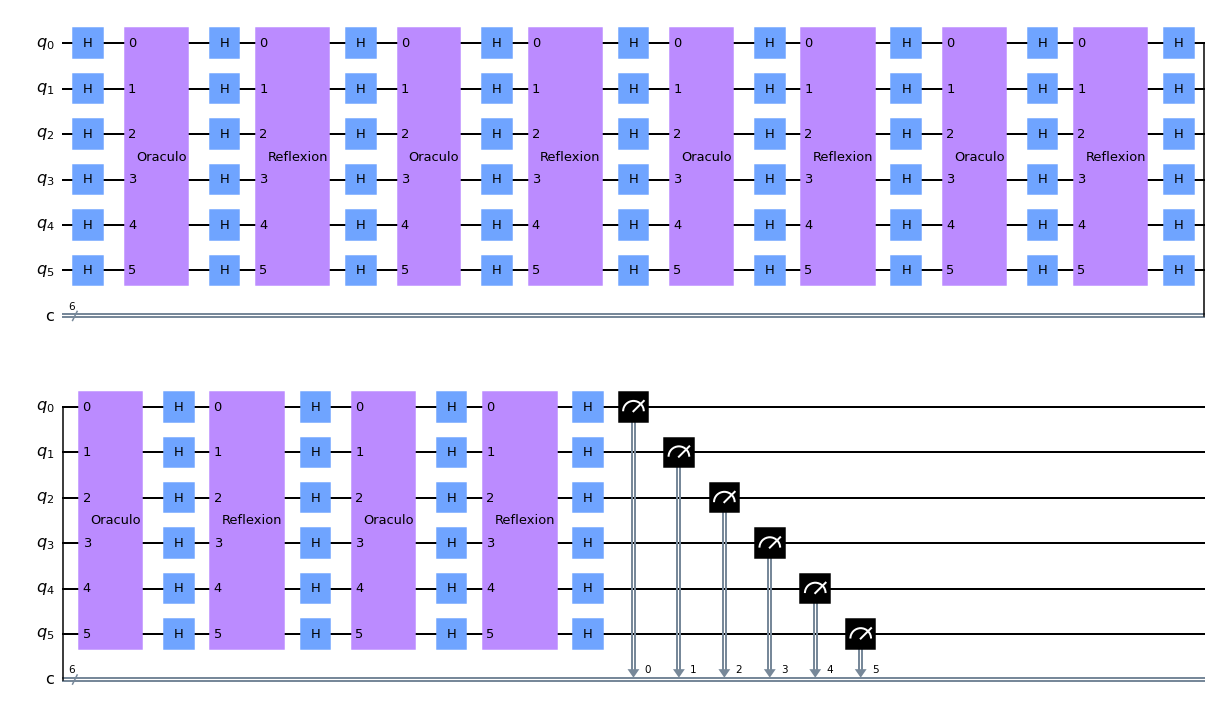

In [16]:
qc.draw('mpl')

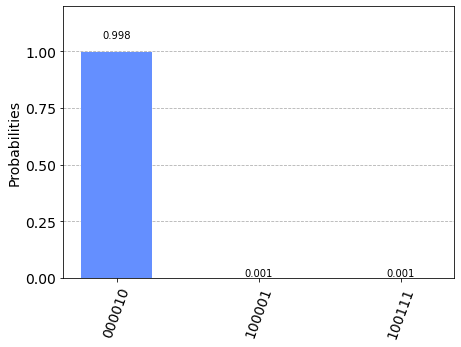

In [18]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=1000).result().get_counts(qc)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [19]:
counts

{'000010': 998, '100001': 1, '100111': 1}